## Telecom Churn Classifier - Kai Graham
### Module 3 Final Project

For this project, I will be following the Cross Industry Standard Process for Data Mining (CRISP-DM) methodology, with the following steps:
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation
6. Deployment

## 1. Business Understanding
I will be building a classifier to predict whethr a customer will soon stop doing business with SyriaTel, a telecommunications company.  As I am hoping to provide insights into customer churn, the likely stakeholders of this project will be the telecommunications company, and specifically the management team, sales reps, and customer service associates.  Understanding whether a customer will soon churn will enable the Company to target customer outreach and provide promotions to customers at high risk of churning, in hopes to get them to stay with the platform. 

## 2. Data Understanding
The data available to us comes from a provided SyriaTel dataset, likely obtained directly by the Company. 

This section will focus on unpacking the dataset and analyzing relationship between potential features to get a better sense of our dataset. 

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

/Users/kai_graham/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/Users/kai_graham/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
# set style of visualizations
plt.style.use('ggplot')

In [3]:
# load dataset
df = pd.read_csv('telecom_churn.csv')

# examine dataset to ensure it loaded correctly
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
# examine dataset further
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

From looking at the above summary of our dataset, we see that the total number of observations we have is 3333, with 20 total columns, one of which is the "churn" column representing our target variable.  The remaining columns will be evaluated as features in building a classifier to predict whether a customer will churn or not. 

In [5]:
# look at summary statistics of numeric columns
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


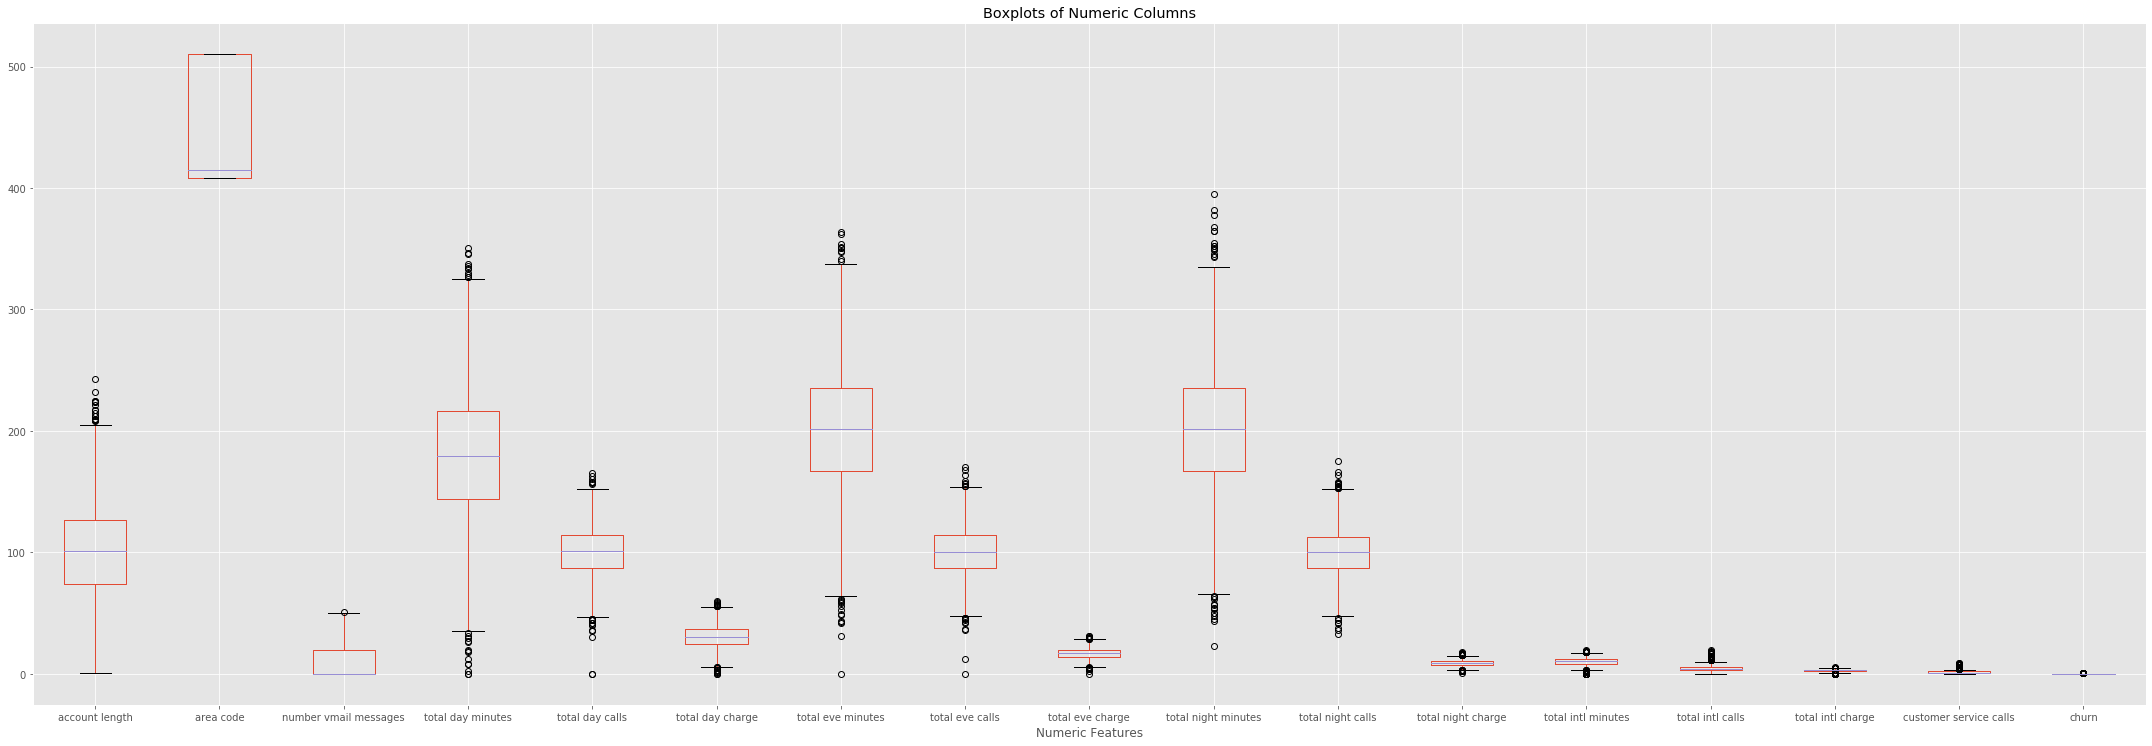

In [6]:
# plot boxplots
plt.figure(figsize=(30, 10))
df.boxplot()
plt.tight_layout()
plt.title('Boxplots of Numeric Columns')
plt.xlabel('Numeric Features')
plt.show()

Looking at the distributions of our data, we can see things appear to be on the same scale, with many features presented in minutes.  Additionally, we can see there are some outliers within many of our features

In [7]:
# identify target and predictor variables into new dataframes
target = df['churn']
predictors = df.drop('churn', axis=1)

Predictor variables are all numeric types except for 'state', 'phone number', 'international plan', and 'voice mail plan'.

In [8]:
# look at breakdown of target variable
print(target.value_counts())
print(target.value_counts(normalize=True))

False    2850
True      483
Name: churn, dtype: int64
False    0.855086
True     0.144914
Name: churn, dtype: float64


From this, we know there is some class imbalance, with >85% of all values labeled as False, or non-churn members.  This means, that if our model labeled every tdata point as False, we would hae >85% accuracy.  We will keep this in mind for later when we begin to build our models, and iterate to hopefully find better results than this. 

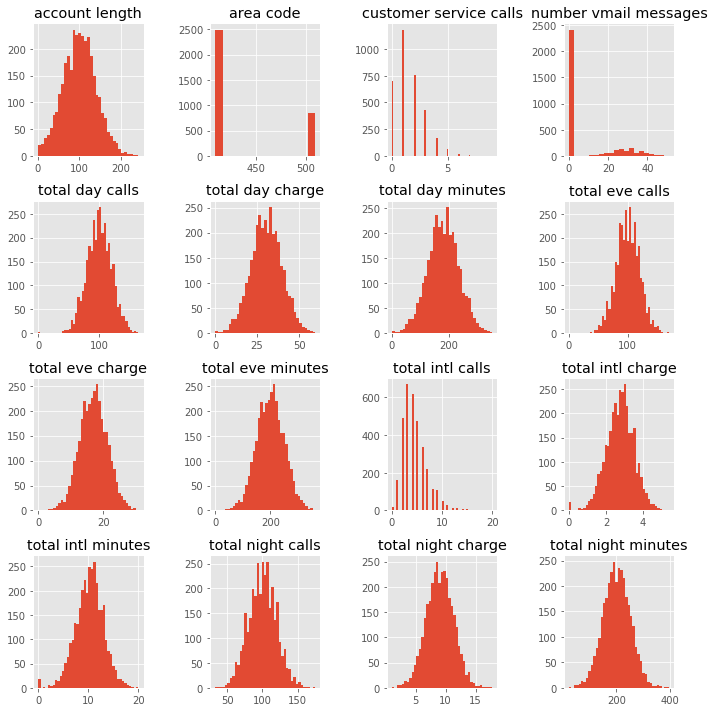

In [9]:
# evaluate distribution of predictors with histograms
predictors.hist(figsize=(10, 10), bins='auto')
plt.tight_layout()
plt.show()

The majority of predictor columns look fairly normally distributed.  Additionally, combined with examining the summary stats presented above, the data all looks to be on a fairly uniform scale, which makes sense as a majority of the feature columns provided are based on the # of minutes.

In [10]:
# separate into two datasets - one for all churned customers and one for non-churned customers
churned_df = df.loc[df['churn'] == True]
non_churned_df = df.loc[df['churn'] == False]

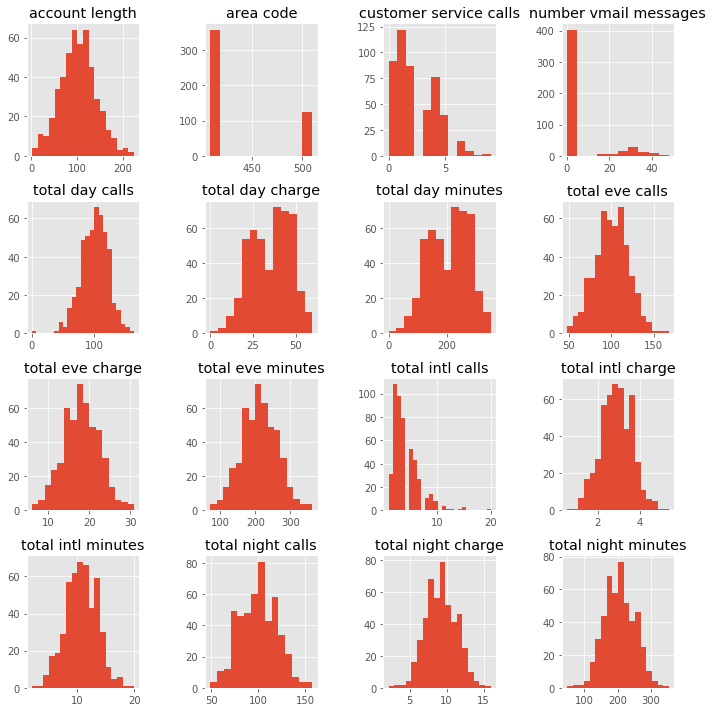

In [11]:
# plot histograms for just churned customers
churned_df.drop('churn', axis=1).hist(figsize=(10, 10), bins='auto')
plt.tight_layout()
plt.show()

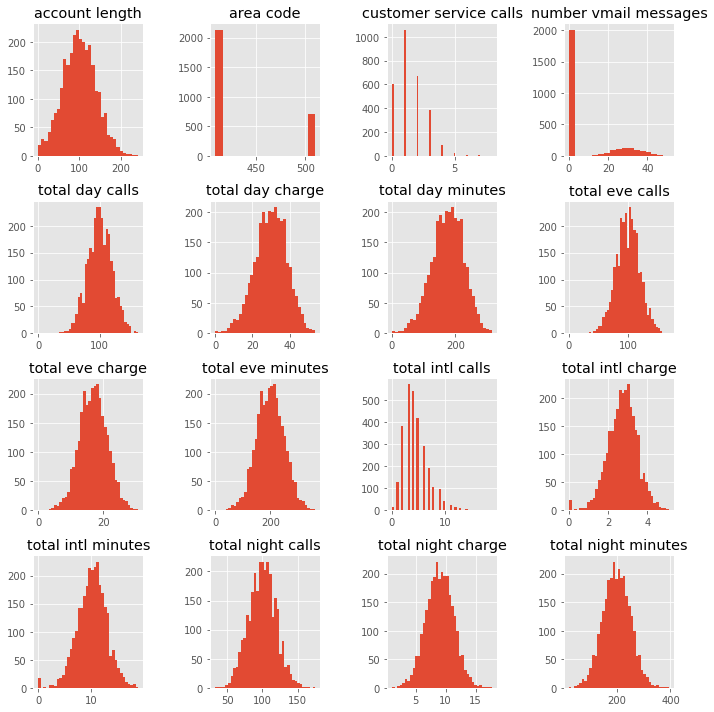

In [12]:
# plot histograms for non-churned customers
non_churned_df.drop('churn', axis=1).hist(figsize=(10,10), bins='auto')
plt.tight_layout()
plt.show()

From first glance, there appears to be a pretty significant difference in the number of customer service calls from churned customers vs. non-churned customers, with churned customers appearing to have higher numbers of customer service calls.

Now that we have a good sense of our numerical data, take a look at categorical features

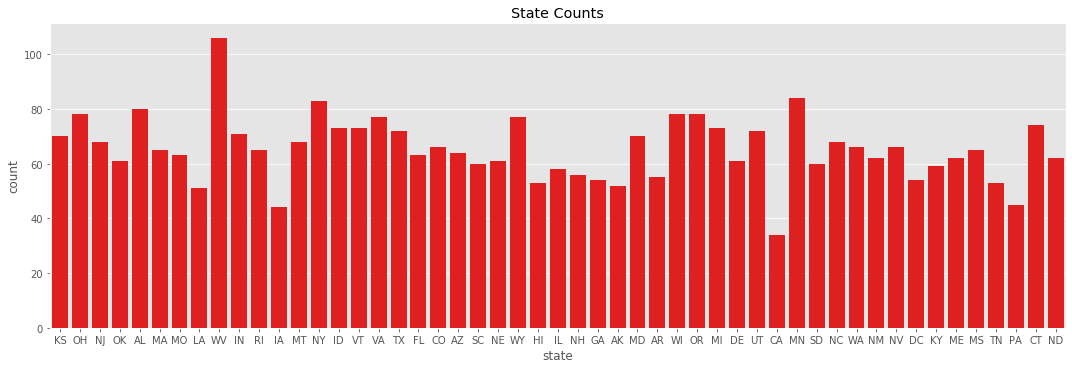

In [13]:
# state
plt.figure(figsize=(15, 5))
sns.countplot(df['state'], color='red')
plt.tight_layout()
plt.title('State Counts')
plt.show()

We can see most states are represented here, with the most customers coming from West Virginia, and the fewest from California

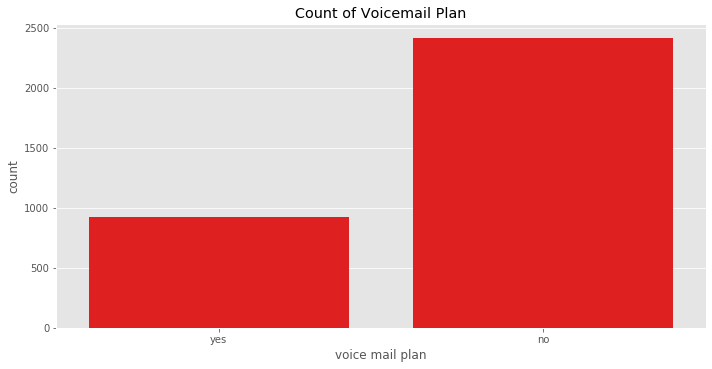

In [14]:
plt.figure(figsize=(10, 5))
sns.countplot(df['voice mail plan'], color='red', order=['yes', 'no'])
plt.tight_layout()
plt.title('Count of Voicemail Plan')
plt.show()

The majority of customers do not have voice mail plans

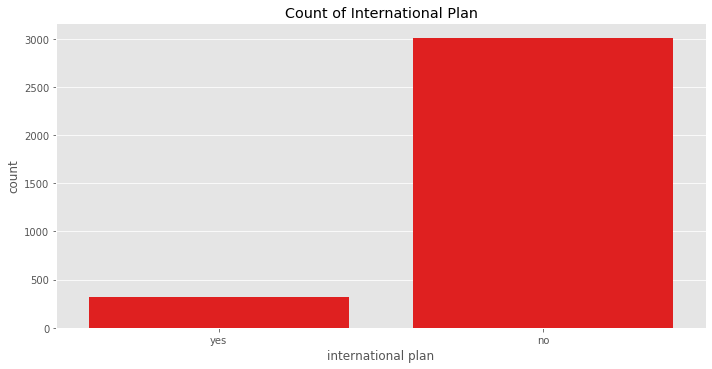

In [15]:
plt.figure(figsize=(10, 5))
sns.countplot(df['international plan'], color='red', order=['yes', 'no'])
plt.tight_layout()
plt.title('Count of International Plan')
plt.show()

Similarly, the majority of customers also do not have international plans

In [16]:
# next, we will evaluate how these three cat features are associated with churn using crosstab
state_crosstab = pd.crosstab(df['state'], df['churn'], normalize='index')
state_crosstab

churn,False,True
state,,
AK,0.942308,0.057692
AL,0.900000,0.100000
AR,0.800000,0.200000
AZ,0.937500,0.062500
CA,0.735294,0.264706
CO,0.863636,0.136364
CT,0.837838,0.162162
DC,0.907407,0.092593
DE,0.852459,0.147541


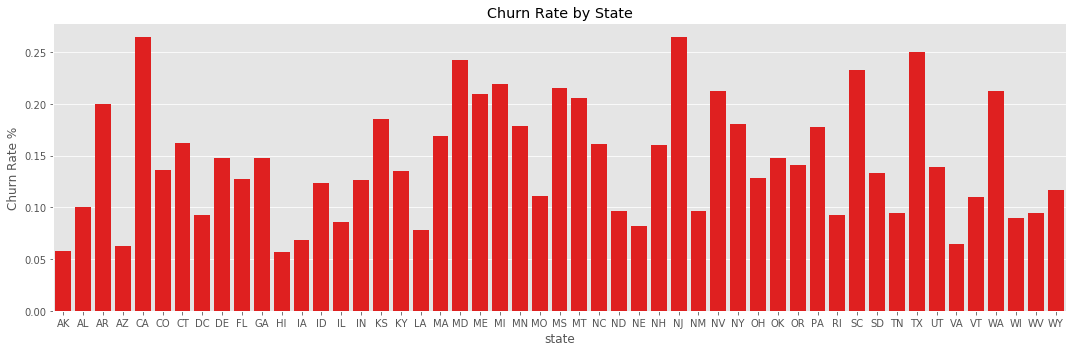

In [17]:
# let's plot these to see if it makes it a little easier to see
plt.figure(figsize=(15, 5))
sns.barplot(state_crosstab.index, y=state_crosstab[1], color='red')
plt.title('Churn Rate by State')
plt.ylabel('Churn Rate %')
plt.tight_layout()
plt.show()

Looking at the above visualization, we can see that California, Maryland, New Jersey, and Texas are associated with the highest churn rates, with Alaska, Hawaii, and Arizona representing the lowest.  It is interesting to note that California was one of the lowest represented states, but is one of the highest churning. 

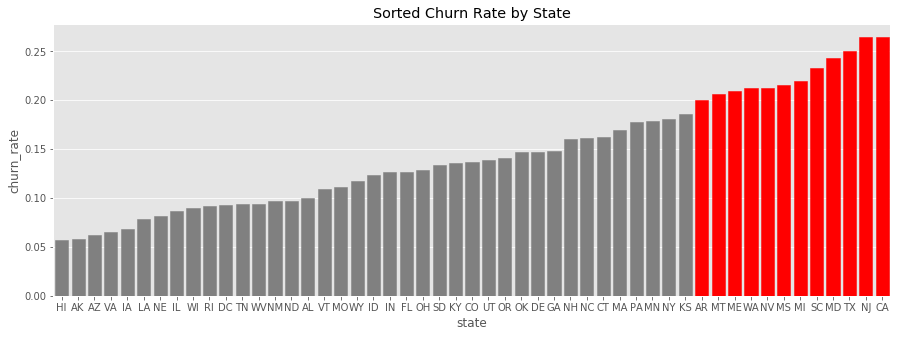

In [18]:
# sort the plot by churn rate to get a better sense of which states are associated with higher churn
sorted_state_churn = state_crosstab[1]
sorted_state_churn = sorted_state_churn.reset_index()
sorted_state_churn.columns = ['state', 'churn_rate']

# sort values based on churn rate
sorted_state_churn.sort_values('churn_rate', inplace=True)

# plot and highlight states with churn rates higher than 20%
plt.figure(figsize=(15, 5))
ax = sns.barplot(sorted_state_churn['state'], sorted_state_churn['churn_rate'], color='red')
plt.title("Sorted Churn Rate by State")

for bar in ax.patches:
    if bar.get_height() >= 0.20:
        bar.set_color('red')
    else:
        bar.set_color('grey')

plt.show()

In [19]:
# International Plan
int_plan_crosstab = pd.crosstab(df['international plan'], df['churn'])
normalized_int_plan_crosstab = pd.crosstab(df['international plan'], df['churn'], normalize='index')

print('International Plan Counts:')
display(int_plan_crosstab)
print('--------------------------------')
print('International Plan %:')
display(normalized_int_plan_crosstab)

International Plan Counts:


churn,False,True
international plan,,
no,2664,346
yes,186,137


--------------------------------
International Plan %:


churn,False,True
international plan,,
no,0.885050,0.114950
yes,0.575851,0.424149


Looking at the crosstab, we can see that churn is significantly higher for those who have international plans (~42.4% vs. 11.5% churn rates)

In [20]:
# Voice Mail
vm_plan_crosstab = pd.crosstab(df['voice mail plan'], df['churn'])
normalized_vm_plan_crosstab = pd.crosstab(df['voice mail plan'], df['churn'], normalize='index')

print('Voice Mail Plan Counts:')
display(vm_plan_crosstab)
print('--------------------------------')
print('Voice Mail Plan %:')
display(normalized_vm_plan_crosstab)

Voice Mail Plan Counts:


churn,False,True
voice mail plan,,
no,2008,403
yes,842,80


--------------------------------
Voice Mail Plan %:


churn,False,True
voice mail plan,,
no,0.832849,0.167151
yes,0.913232,0.086768


It looks like customers who have voice mail plans are related with lower churn rates than those without voice mail plans (8.7% vs. 16.7%).  Now that we have a good sense of our categorical features and how these relate to churn, start evaluating numerical relationships. 

In [21]:
# start with pairplot
# sns.pairplot(df, hue='churn')

While this pairplot is slightly large, we can see there are some relations in our variables.  Additionally, from the straight line relationships, it looks to be that minutes are perfectly correlated with charges. Additionally, it looks like the majority of users that churn are not on either extreme of usage (calls, minutes, charges), whereas those that tend to not churn are near either heavy usage or very light usage (ring of red around blue).   Further explore relationships to get a better sense of which features will help in classification.

In [22]:
# plot boxplots vs. churn to better understand relationship between churn and numerical columns
num_cols = ['account length', 'area code', 'number vmail messages', 
            'total day minutes', 'total day calls', 'total day charge',
            'total eve minutes', 'total eve calls', 'total eve charge', 
            'total night minutes', 'total night calls', 'total night charge',
            'total intl minutes', 'total intl calls', 'total intl charge',
            'customer service calls']

In [23]:
# translate churn column into 1 if they churn and 0 if not
df['churn'] = df['churn'].astype('int')

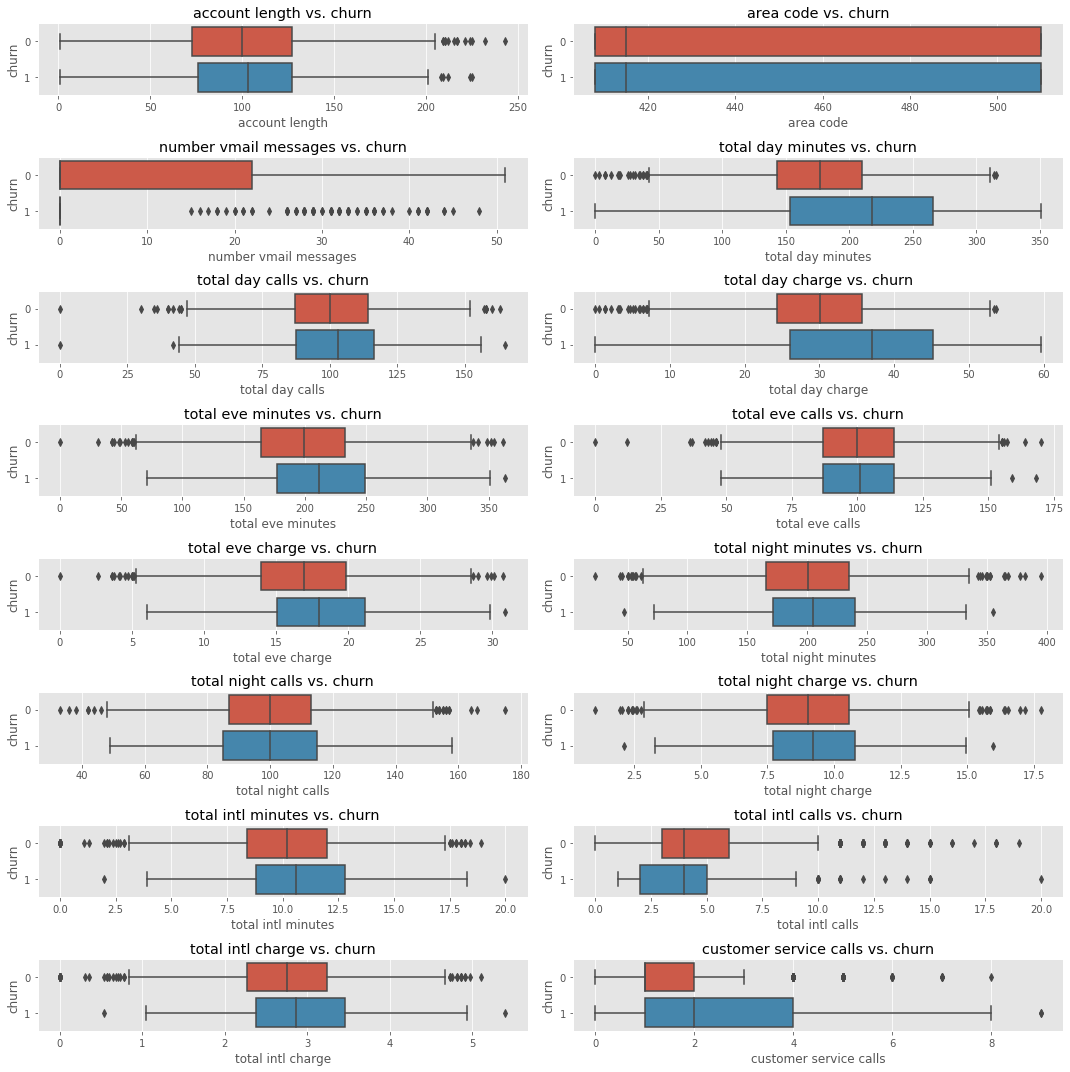

In [24]:
# plot boxplots
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(15, 15))
for ax, feat in zip(axes.flatten(), num_cols):
    sns.boxplot(x=feat, y=df['churn'].astype('category'), data=df, ax=ax)
    ax.set_title(f'{feat} vs. churn')
plt.tight_layout()
plt.show()

From the above boxplots, account length, area code, total day calls, total eve calls, total night calls, and total intl calls seem more or less equally distributed among those that churned and those that did not. This indicates that these features might not be good predictors for our target (churn).  

The following variables did not appear to be equally distributed among those that churned and those that did not churn, signifying these might be better predictors for our model.  Additionally, the below text highlights findings from the above.

 - Number of Voicemail Messages: it looks like the number of vmail messages is distributed closer to 0 for those that churned - - a higher number of voicemail messages may indicate a lower likelihood to churn
 - Total Day Minutes / Total Day Charge: those that churned were associated with higher median day minutes / charges
 - Total Eve Minutes / Total Eve Charge: those that churned were associated with higher median eve minutes / charges
 - Total Night Minutes / Total Night Charge: those that churned were associated with higher median night minutes / charges
 - Total Intl Minutes / Total Intl Charge: those that churned were associated with higher median intl minutes / charges
 - Customer Service Calls: those that churned were associated with higher median customer service calls, which may indicate dissatisfaction with service received

In [25]:
# plot crosstab of customer service calls to further explore
service_call_crosstab = pd.crosstab(df['customer service calls'], df['churn'], normalize='index')
service_call_crosstab

churn,0,1
customer service calls,,
0,0.868006,0.131994
1,0.896698,0.103302
2,0.885375,0.114625
3,0.897436,0.102564
4,0.542169,0.457831
5,0.393939,0.606061
6,0.363636,0.636364
7,0.444444,0.555556
8,0.500000,0.500000


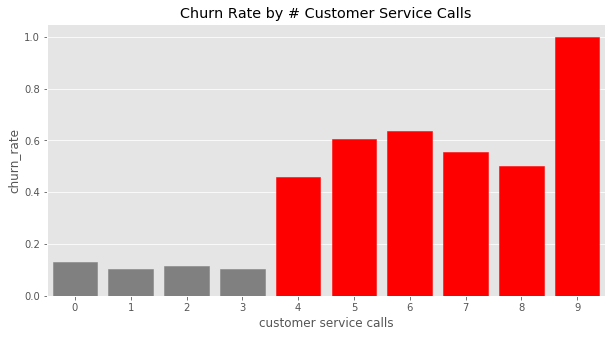

In [26]:
# plot 
service_call_churn = service_call_crosstab[1]
service_call_churn = service_call_churn.reset_index()
service_call_churn.columns = ['customer service calls', 'churn_rate']

plt.figure(figsize=(10, 5))
ax = sns.barplot(service_call_churn['customer service calls'], service_call_churn['churn_rate'], color='red')
plt.title("Churn Rate by # Customer Service Calls")

# again set color of 20% or higher churn to red
for bar in ax.patches:
    if bar.get_height() >= 0.20:
        bar.set_color('red')
    else:
        bar.set_color('grey')

plt.show()

We can see there is a clear jump in churn rate as the number of customer service calls goes beyond 3.  There is some variability of churn rate with service call numbers between 4 and 8, but another significant jump up with all customers with 9 customer service calls churning.

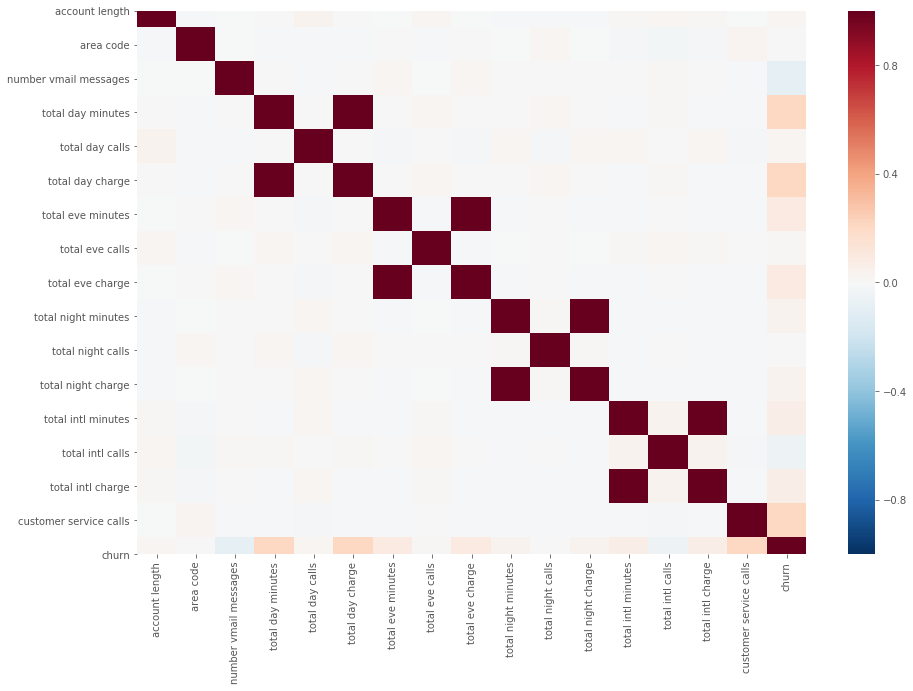

In [27]:
# plot a heatmap of correlations
corr = df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='RdBu_r', annot=False, vmax=1, vmin=-1)
plt.show()

From the above heatmap, we can confirm that total intl minutes is perfectly correlated with total intl charge; total night charge is perfectly correlated with total night minutes; total eve minutes is perfectly correlated with total eve charge; and total day minutes is perfectly correlated with total day charge.

Additionally, we can see the following relationships:

- number of vmail messages is slightly negatively correlated with churn
- total day minutes / charge is positively correlated with churn
- total eve minutes is slightly postively correlated with churn
- customer service calls are positively correlated with churn

This information will be helpful as we start to think about which predictors to use in our model

Now that we have a good understanding of our data, there are a few variables I want to engineer to see how they could potentially relate to churn.  These include:
- total non-international calls
- total calls, including international
- total charges (including and excluding international) - minutes will not be needed as they are perfectly correlated with charges
- total average talk time (minutes / calls) both including and excluding international calls

In [28]:
# creation of new variables
df['all_non_intl_calls'] = df['total day calls'] + df['total eve calls'] + df['total night calls']
df['all_calls'] = df['all_non_intl_calls'] + df['total intl calls']
df['all_non_intl_mins'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes']
df['all_mins'] = df['all_non_intl_mins'] + df['total intl minutes']
df['avg_non_intl_call_time'] = df['all_non_intl_mins'] / df['all_non_intl_calls']
df['avg_call_time'] = df['all_mins'] / df['all_calls']

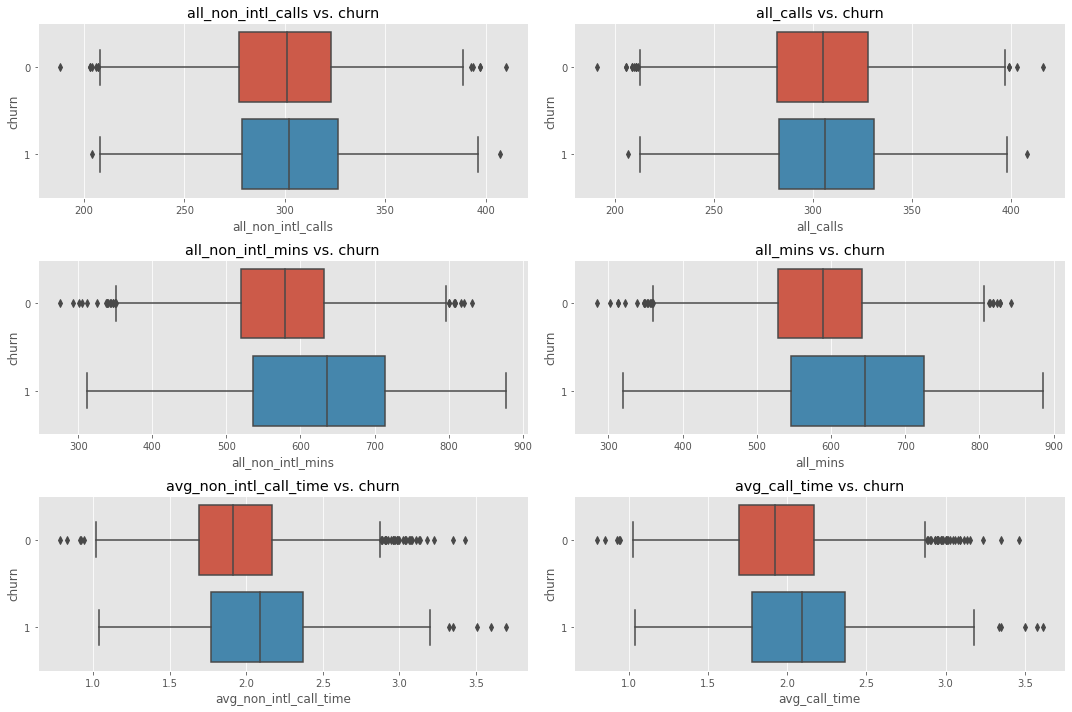

In [29]:
# plot boxcharts of new variables to understand relationship with churn
new_cols = ['all_non_intl_calls', 'all_calls', 'all_non_intl_mins', 
            'all_mins', 'avg_non_intl_call_time', 'avg_call_time']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
for ax, feat in zip(axes.flatten(), new_cols):
    sns.boxplot(x=feat, y=df['churn'].astype('category'), data=df, ax=ax)
    ax.set_title(f'{feat} vs. churn')
plt.tight_layout()
plt.show()

The number of total calls, both including and excluding international calls appear to be equally distributed between those that churned and those that did not churn. 

Total minutes and total non international minutes showed a higher median minute number for those that churned vs. those that did not churn.

There also appears to be a relationship between average call time (both intl and non-intl) and churn, with those churning having a higher median average call time.

In [30]:
# examine how many customers have positive voicemail numbers but not voicemail plan and see how this relates
# to churn
voicemails_with_no_plan = df.loc[(df['number vmail messages'] > 0) & (df['voice mail plan'] == False)]
len(voicemails_with_no_plan)

0

In [31]:
# examine how many customers have positive intl minutes but no international plan
intl_mins_with_no_plan = df.loc[(df['total intl minutes'] > 0) & (df['international plan'] == False)]
len(intl_mins_with_no_plan)

0

There are no instances of customers having postive voicemail balances with no voicemail plan and positive international minutes and no international plan.  There may have been a correlation to customers being charged more for plans they did not have, but that does not appear to be the case.

Now that we have aa good understanding of the data, we can start to prepare things for preprocessing and modeling.

## 3. Data Preparation

In [32]:
# SEED for random state
SEED = 923

In [33]:
# reload raw dataset 
raw_df = df.copy()
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

We can see that state, phone number, international plan, and voice mail plan are all of type string.  We will need to handle these conversions before modeling.  Additionally, before moving forward make sure there are no duplicates or missing values.

In [34]:
# check for missing values
raw_df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
all_non_intl_calls        0
all_calls                 0
all_non_intl_mins         0
all_mins                  0
avg_non_intl_call_time    0
avg_call_time             0
dtype: int64

In [35]:
# check for duplicates
raw_df.duplicated().any()

False

There are no missing values or duplicates within our dataset. We will now move on to handling any data type conversions that were not handled in the EDA portion above.

In [36]:
# create another copy of the df to clean
clean_df = raw_df.copy()

In [38]:
# drop all charge columns as these correlate perfectly with respective minutes columns
clean_df.drop(['total day charge', 'total eve charge', 'total night charge', 'total intl charge'], axis=1, inplace=True)

In [40]:
# set index to phone number
clean_df = clean_df.set_index('phone number')

In [41]:
# feature selection using EDA above to select features that appear related to churn
# including phone number here so we can use it with our final model as a ID
predictors = ['state', 'account length', 'international plan', 'voice mail plan',
              'number vmail messages', 'total day minutes', 'total eve minutes', 
              'total night minutes', 'total intl minutes', 'customer service calls', 
              'all_non_intl_calls', 'all_calls', 'all_non_intl_mins', 'all_mins', 
              'avg_non_intl_call_time', 'avg_call_time']

In [43]:
# before any further preprocessing, split into stratified test-train set so there is no data leakage
# split raw dataset into X and y
X = clean_df[predictors]
y = clean_df['churn']
final_clean_df = pd.concat([X, y], axis=1)

# create train and test sets, stratify to keep proportions
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED, stratify=y)

In [44]:
# encode columns
# state
ohe = OneHotEncoder(categories='auto', handle_unknown='ignore', sparse=False)
X_train_state_encoded = ohe.fit_transform(X_train[['state']])
X_train_state_encoded = pd.DataFrame(X_train_state_encoded, columns=ohe.categories_[0], index=X_train.index)
X_test_state_encoded = ohe.transform(X_test[['state']])
X_test_state_encoded = pd.DataFrame(X_test_state_encoded, columns=ohe.categories_[0], index=X_test.index)

# drop initial state column from both test and train data, and concat with remaining features
X_train = X_train.drop('state', axis=1)
X_test = X_test.drop('state', axis=1)
X_train_ohe = pd.concat([X_train, X_train_state_encoded], axis=1)
X_test_ohe = pd.concat([X_test, X_test_state_encoded], axis=1)

In [45]:
# label encode voice mail plan and international plan
le = LabelEncoder()

# encode international plan
X_train_ohe['intl_plan_encoded'] = le.fit_transform(X_train_ohe['international plan'])
X_test_ohe['intl_plan_encoded'] = le.transform(X_test_ohe['international plan'])

# encode voicemail plan
X_train_ohe['vm_plan_encoded'] = le.fit_transform(X_train_ohe['voice mail plan'])
X_test_ohe['vm_plan_encoded'] = le.transform(X_test_ohe['voice mail plan'])

# drop original columns
X_train_encoded = X_train_ohe.drop(['international plan', 'voice mail plan'], axis=1)
X_test_encoded = X_test_ohe.drop(['international plan', 'voice mail plan'], axis=1)

X_train_final = X_train_encoded.copy()
X_test_final = X_test_encoded.copy()

In [46]:
# print initial target class weights
print('Initial Class Weights of Target:')
print(y_train.value_counts())
print(y_train.value_counts(normalize=True))

Initial Class Weights of Target:
0    2137
1     362
Name: churn, dtype: int64
0    0.855142
1    0.144858
Name: churn, dtype: float64


If our model were to guess every customer as "no churn", it would be right 85.5% of the time.  We will keep this in mind going forward to try and find a model that outperforms this.

In [47]:
# create synthetic training data using SMOTE to address imbalance
X_train_resampled, y_train_resampled = SMOTE(random_state=SEED).fit_resample(X_train_final, y_train)
X_train_resampled = pd.DataFrame(X_train_resampled, columns=X_train_final.columns)
# print new class weights
print('Balanced Class Weights of Target:')
print(pd.Series(y_train_resampled).value_counts())
print(pd.Series(y_train_resampled).value_counts(normalize=True))

Balanced Class Weights of Target:
1    2137
0    2137
dtype: int64
1    0.5
0    0.5
dtype: float64


## 4. Modeling
This is a classification task, aimed at predicting if a customer will churn or not.  As a result, we will be focused on a number of classification methods and will iterate through a number of potential models / hyperparameters to arrive at the optimal model for our task. 

Models we will try include Decision Trees, K-Nearest Neighbors, and Random Forests:
- Decision Trees: will be especially helpful as decision trees can help with feature importance and identification of certain feature splits, etc. 
- Random Forest
- XG Boost

We have now taken steps to understand the data available to us, as well as, preprocessed and prepared the data for modeling.  Before running our models, we should decide which performance metrics will be used to compare each of our iterations.  For each model, I will be generating the following metrics:

 - Accuracy: total number of correct predictions out of total observations.  
 - Recall: number of true positives out of actual total positives. Out of all the customers we saw that churned, what percentage of them did our model correctly identifying as churning?
 - Precision: number of true positives out of predicted positives.  Out of all the times, our models said a patient would churn, how many times did the customer in question actually churn?
 - F1 Score: harmonic mean of precision and recall. Can't be high unless recall and precision are high. 
 - ROC AUC: AUC is an alternative comprehensive metric and ROC graphs allow us to find an optimal precision, recall tradeoff.  ROC graphs plot true positive rate vs. false positive rate
 
In the context of the telecommunications company churn, we will likely want to focus on a model that produces high recall, and will likely care more about our true positive rate vs. false positive rate.  It is important our model identifies potential churn customers properly, and it is probably ok to generate a few false positives and identify a customer as churning when they are not going to in reality.  Customer outreach, special promotions, etc. can be targeted at customers our model identifies as churning, and the downside to providing these benefits to a customer that isn't going to churn is just not that material.  

In [48]:
def print_model_scores(X_train, X_test, y_train, y_test, model, model_name):
    """
    Function to return accuracy, recall, precision, f1, roc_auc, and neg_log_loss from given X_train, X_test, y_train, y_test, and fit model.
    """
    # create predictions using model
    y_test_preds = model.predict(X_test)
    y_train_preds = model.predict(X_train)
    
    # accuracy scores
    train_accuracy = accuracy_score(y_train, y_train_preds)
    test_accuracy = accuracy_score(y_test, y_test_preds)
    
    # precision score
    train_precision = precision_score(y_train, y_train_preds)
    test_precision = precision_score(y_test, y_test_preds)
    
    # recall score
    train_recall = recall_score(y_train, y_train_preds)
    test_recall = recall_score(y_test, y_test_preds)
    
    # f1 score
    train_f1 = f1_score(y_train, y_train_preds)
    test_f1 = f1_score(y_test, y_test_preds)
    
    # roc_auc
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_test_preds)
    test_roc_auc = auc(false_positive_rate, true_positive_rate)
    fpr, tpr, thresh = roc_curve(y_train, y_train_preds)
    train_roc_auc = auc(fpr, tpr)
    
    print('Accuracy:')
    print(f'Training Set: {train_accuracy}')
    print(f'Test Set: {test_accuracy}')
    print('---------------------------------')
    print('Precision:')
    print(f'Training Set: {train_precision}')
    print(f'Test Set: {test_precision}')
    print('---------------------------------')
    print('Recall:')
    print(f'Training Set: {train_recall}')
    print(f'Test Set: {test_recall}')
    print('---------------------------------')
    print('F1 Score:')
    print(f'Training Set: {train_f1}')
    print(f'Test Set: {test_f1}')
    print('---------------------------------')
    print(f'ROC AUC:')
    print(f'Training Set: {train_roc_auc}')
    print(f'Test Set: {test_roc_auc}')
    
    test_results = pd.DataFrame([[f'Test-{model_name}', test_accuracy, test_precision, test_recall, test_f1, test_roc_auc]],
                                columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])
    
    train_results = pd.DataFrame([[f'Training-{model_name}', train_accuracy, train_precision, train_recall, train_f1, train_roc_auc]],
                                columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])
    
    # concat results
    results = pd.concat([test_results, train_results], axis=0)
    
    return results

In [49]:
def plot_feature_importances(model, X_train, y_train):
    """
    Function to plot feature importances from a given model
    """
    n_features = X_train.shape[1]
    plt.figure(figsize=(15,15))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

In [50]:
# create first model 
dtree_baseline = DecisionTreeClassifier(random_state=SEED)
dtree_baseline.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=923, splitter='best')

In [51]:
# print results of baseline model
dtree_baseline_results = print_model_scores(X_train_resampled, 
                                            X_test_final, 
                                            y_train_resampled, 
                                            y_test, 
                                            dtree_baseline,
                                            'dtree_baseline')

Accuracy:
Training Set: 1.0
Test Set: 0.8788968824940048
---------------------------------
Precision:
Training Set: 1.0
Test Set: 0.5746268656716418
---------------------------------
Recall:
Training Set: 1.0
Test Set: 0.6363636363636364
---------------------------------
F1 Score:
Training Set: 1.0
Test Set: 0.603921568627451
---------------------------------
ROC AUC:
Training Set: 1.0
Test Set: 0.7782098686727017


In [52]:
dtree_baseline_results

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Test-dtree_baseline,0.878897,0.574627,0.636364,0.603922,0.77821
0,Training-dtree_baseline,1.000000,1.000000,1.000000,1.000000,1.00000


After running the baseline decision tree model, we see we are getting an accuracy score aorund 87.8%.  This is slight improvement over a simple model that guessed "False" for every customer churn value.  Our simple model would have accuracy around 85.5%, so the baseline decision tree model shows some improvement.  

In terms of the metric we are most likely interested in, recall is at 63.6% for our baseline decision tree model.  This means that out of all the customers that churned, our model correcty identified ~63.6% of them.  Clearly there is some room for improvement here. 

Furthermore, we see an AUC on our testing set of 0.778.  Looking at our training scores, the large difference between testing and training sets shows our models are overfitting to training data.  To address overfitting, will move forward with pruning our tree and adjusting other hyperparemeters to try and improve performance.

In [53]:
# tune hyperparameters using grid search, we know we are overfitting so prune with hyperparameters
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 6, 7, 8],
    'min_samples_split': [4, 5, 6, 7],
    'min_samples_leaf': [2, 3, 4, 5],
}

# create grid search
dt_grid_search = GridSearchCV(dtree_baseline, dt_param_grid, cv=3, return_train_score=True, scoring='f1')

# fit to training data
dt_grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=923,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8],
                         '

In [54]:
# Mean training score
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(X_test_final, y_test)

# print scores and best params
print(f'Mean Training Score: {dt_gs_training_score}')
print(f'Mean Testing Score: {dt_gs_testing_score}')
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 0.9323301434460596
Mean Testing Score: 0.7302904564315353
Best Parameter Combination Found During Grid Search:


{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 3,
 'min_samples_split': 4}

In [55]:
# rerun a decision tree with these parameters
best_dt_model = DecisionTreeClassifier(random_state=SEED,
                                       criterion='entropy',
                                       max_depth=8,
                                       min_samples_leaf=3,
                                       min_samples_split=4)

# fit model
best_dt_model.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=923, splitter='best')

In [56]:
best_dt_results = print_model_scores(X_train_resampled,
                                     X_test_final,
                                     y_train_resampled,
                                     y_test,
                                     best_dt_model,
                                     'best_dt')

Accuracy:
Training Set: 0.9510996724379972
Test Set: 0.9220623501199041
---------------------------------
Precision:
Training Set: 0.9868686868686869
Test Set: 0.7333333333333333
---------------------------------
Recall:
Training Set: 0.914365933551708
Test Set: 0.7272727272727273
---------------------------------
F1 Score:
Training Set: 0.9492348797668205
Test Set: 0.7302904564315353
---------------------------------
ROC AUC:
Training Set: 0.9510996724379972
Test Set: 0.8411959709294913


In [57]:
# compare baseline results with our tuned results
display(dtree_baseline_results)
display(best_dt_results)

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Test-dtree_baseline,0.878897,0.574627,0.636364,0.603922,0.77821
0,Training-dtree_baseline,1.000000,1.000000,1.000000,1.000000,1.00000


,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Test-best_dt,0.922062,0.733333,0.727273,0.730290,0.841196
0,Training-best_dt,0.951100,0.986869,0.914366,0.949235,0.951100


Comparing our tuned decision tree to our baseline results, we see that testing scores are up significantly across the board, with f1 score up from 0.60 to 0.73.  Similar with Recall, testing is now at ~72.7% vs. baseline of 63.6%.  

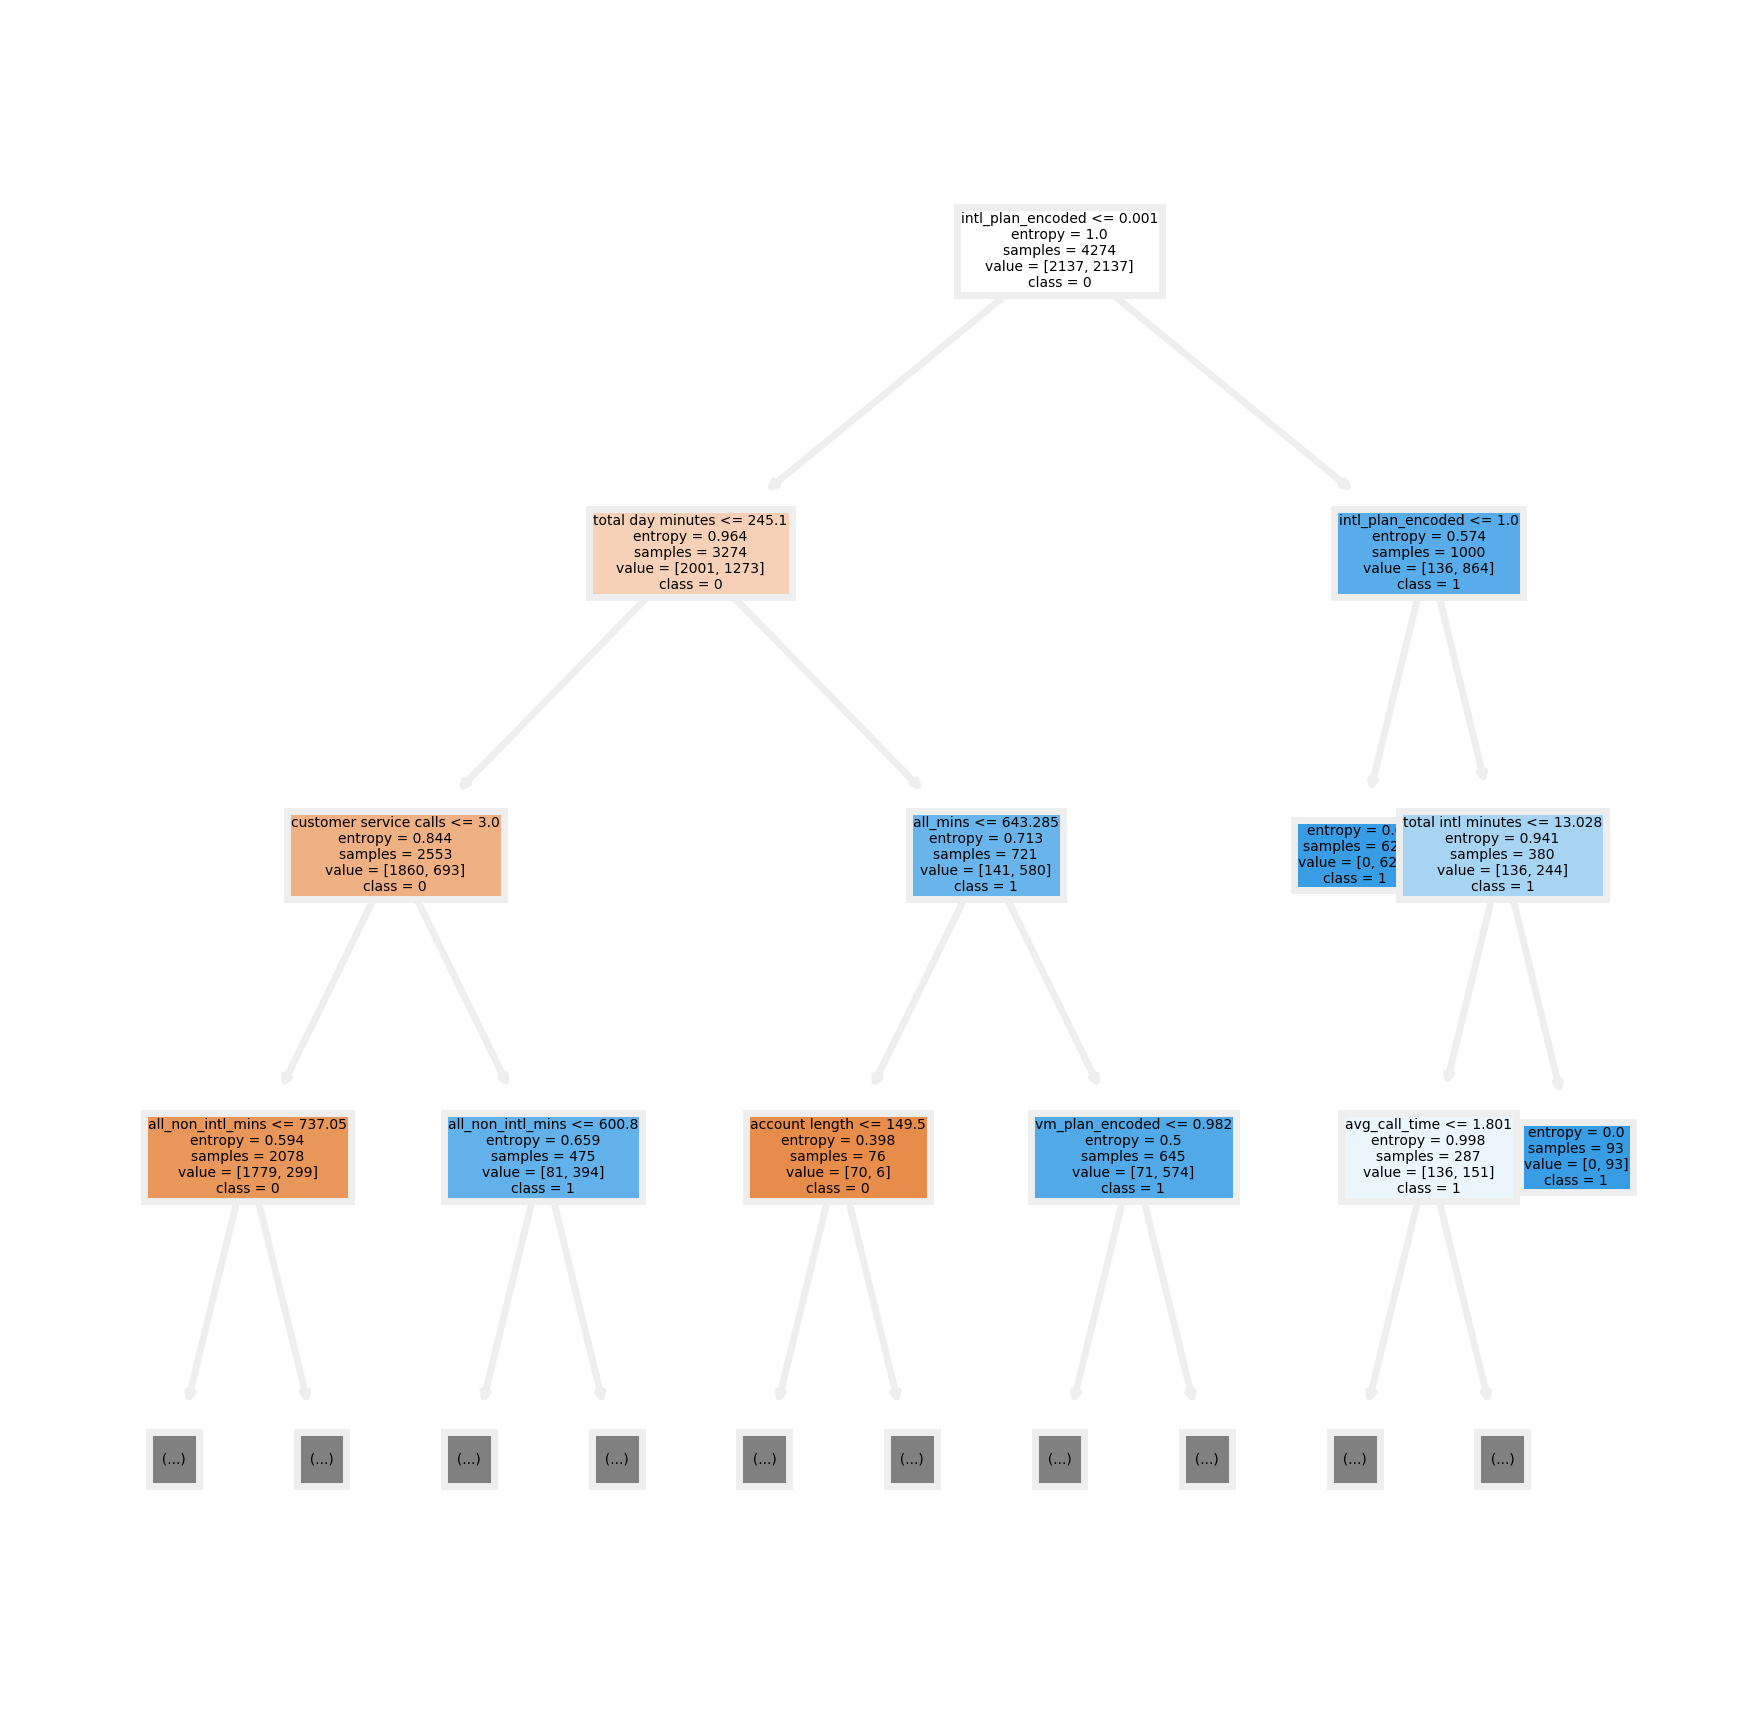

In [58]:
# evaluate the splits of our best decision tree
plt.figure(figsize=(2,2), dpi=1000)
tree.plot_tree(best_dt_model, feature_names=X_train_final.columns, class_names=np.unique(y).astype('str'), 
               filled=True, max_depth=3)
plt.show()

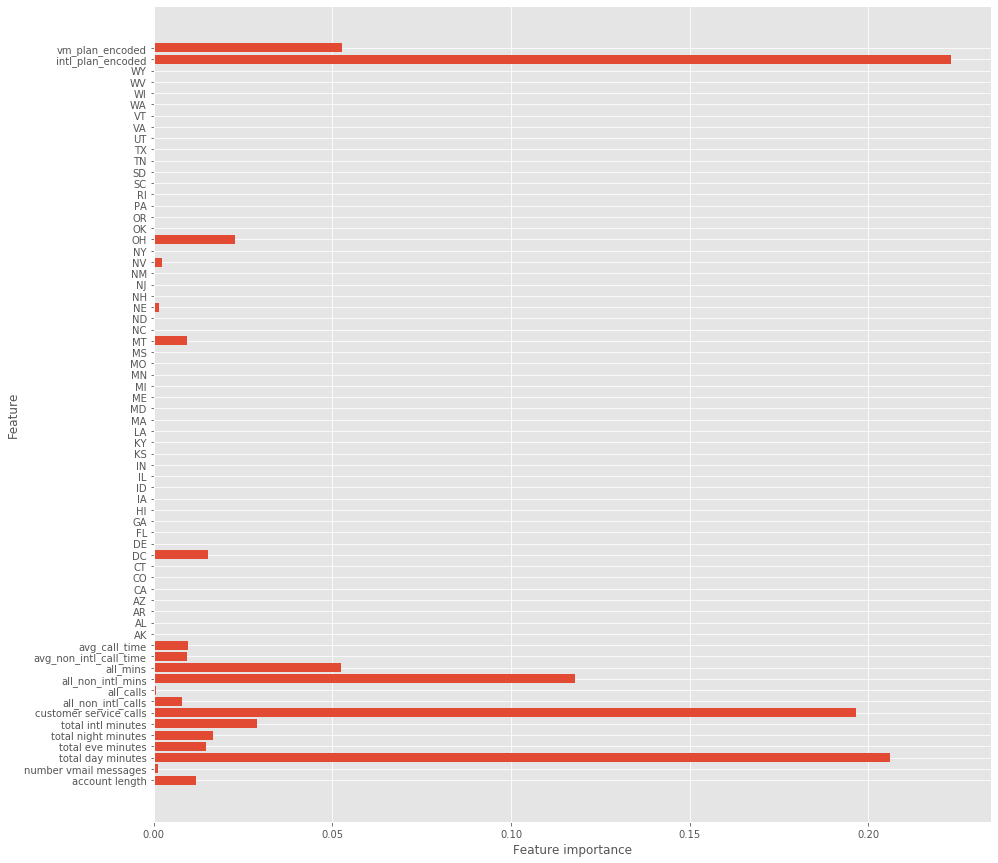

In [59]:
# plot feature importances
plot_feature_importances(best_dt_model, X_train_final, y_train)

Build and tune random forest.

In [60]:
# build baseline random forest with max_depth=8, and n_estimators=100
baseline_rf_model = RandomForestClassifier(random_state=SEED,
                                           n_estimators=100)

# fit to training data
baseline_rf_model.fit(X_train_resampled, y_train_resampled)

# store results
baseline_rf_results = print_model_scores(X_train_resampled,
                                         X_test_final,
                                         y_train_resampled,
                                         y_test,
                                         baseline_rf_model,
                                         'baseline_rf')

Accuracy:
Training Set: 1.0
Test Set: 0.9304556354916067
---------------------------------
Precision:
Training Set: 1.0
Test Set: 0.8
---------------------------------
Recall:
Training Set: 1.0
Test Set: 0.6942148760330579
---------------------------------
F1 Score:
Training Set: 1.0
Test Set: 0.743362831858407
---------------------------------
ROC AUC:
Training Set: 1.0
Test Set: 0.8323809303026439


In [61]:
# compare results with our best dt
display(best_dt_results)
display(baseline_rf_results)

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Test-best_dt,0.922062,0.733333,0.727273,0.730290,0.841196
0,Training-best_dt,0.951100,0.986869,0.914366,0.949235,0.951100


,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Test-baseline_rf,0.930456,0.8,0.694215,0.743363,0.832381
0,Training-baseline_rf,1.000000,1.0,1.000000,1.000000,1.000000


While we are still overfitting slightly on our baseline random forest classifier, we can see that the results on our test set are fairly strong, coming in close to our best decision tree results.  Move forward with further hyperparameter tuning to address overfitting.  

In [62]:
# gridsearch random forest hyperparams
rf_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 6, 7, 8],
    'min_samples_split': [4, 5, 6, 7],
    'min_samples_leaf': [2, 3, 4, 5],
    'n_estimators': [100]
}

# create grid search
rf_grid_search = GridSearchCV(baseline_rf_model, 
                              rf_param_grid, 
                              cv=3, 
                              return_train_score=True, 
                              scoring='f1')

# fit to data
rf_grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=923,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'cr

In [63]:
# Mean training score
rf_gs_training_score = np.mean(rf_grid_search.cv_results_['mean_train_score'])

# Mean test score
rf_gs_testing_score = rf_grid_search.score(X_test_final, y_test)

print(f'Mean Training Score: {rf_gs_training_score}')
print(f'Mean Testing Score: {rf_gs_testing_score}')
print("Best Parameter Combination Found During Grid Search:")
rf_grid_search.best_params_

Mean Training Score: 0.933618010386841
Mean Testing Score: 0.7053941908713693
Best Parameter Combination Found During Grid Search:


{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 2,
 'min_samples_split': 7,
 'n_estimators': 100}

In [64]:
# run model at these params
best_rf_model = RandomForestClassifier(random_state=SEED,
                                       criterion='entropy',
                                       max_depth=8,
                                       min_samples_leaf=2,
                                       min_samples_split=7,
                                       n_estimators=100)

# fit model
best_rf_model.fit(X_train_resampled, y_train_resampled)

# store results
best_rf_results = print_model_scores(X_train_resampled,
                                     X_test_final,
                                     y_train_resampled,
                                     y_test,
                                     best_rf_model,
                                     'best_rf')

Accuracy:
Training Set: 0.9527374824520356
Test Set: 0.9148681055155875
---------------------------------
Precision:
Training Set: 0.9726428920371275
Test Set: 0.7083333333333334
---------------------------------
Recall:
Training Set: 0.931679925128685
Test Set: 0.7024793388429752
---------------------------------
F1 Score:
Training Set: 0.9517208413001912
Test Set: 0.7053941908713693
---------------------------------
ROC AUC:
Training Set: 0.9527374824520356
Test Set: 0.826695489898346


In [65]:
# compare results to our best dtree
print('Best Random Forest:')
display(best_rf_results)
print('Best Decision Tree:')
display(best_dt_results)

Best Random Forest:


,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Test-best_rf,0.914868,0.708333,0.702479,0.705394,0.826695
0,Training-best_rf,0.952737,0.972643,0.931680,0.951721,0.952737


Best Decision Tree:


,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Test-best_dt,0.922062,0.733333,0.727273,0.730290,0.841196
0,Training-best_dt,0.951100,0.986869,0.914366,0.949235,0.951100


When comparing our best random forest classifier vs. our best decision tree classifier, we can see that accuracy, precision, and f1 score are higher with the random forest classifier.  However, with the metric we are most concerned with, recall, we see the decision tree is still outperforming. Additionally, our dtree seems to generalize to testing data better, with testing and training recall scores closer to each other. For these reasons, we will stick with the decision tree model.

In [66]:
# run a SVC and see if we can improve scoring
from xgboost import XGBClassifier

# create baseline classifier
baseline_xgb = XGBClassifier(random_state=SEED)

# fit
baseline_xgb.fit(X_train_resampled, y_train_resampled)

# store scores
baseline_xgb_results = print_model_scores(X_train_resampled,
                                          X_test_final,
                                          y_train_resampled,
                                          y_test,
                                          baseline_xgb,
                                          'baseline_xgb')

Accuracy:
Training Set: 0.9597566682264858
Test Set: 0.935251798561151
---------------------------------
Precision:
Training Set: 0.9781021897810219
Test Set: 0.7863247863247863
---------------------------------
Recall:
Training Set: 0.940570893776322
Test Set: 0.7603305785123967
---------------------------------
F1 Score:
Training Set: 0.9589694656488551
Test Set: 0.773109243697479
---------------------------------
ROC AUC:
Training Set: 0.9597566682264858
Test Set: 0.8626337324539544


In [67]:
# compare to best decision tree
display(best_dt_results)
display(baseline_xgb_results)

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Test-best_dt,0.922062,0.733333,0.727273,0.730290,0.841196
0,Training-best_dt,0.951100,0.986869,0.914366,0.949235,0.951100


,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Test-baseline_xgb,0.935252,0.786325,0.760331,0.773109,0.862634
0,Training-baseline_xgb,0.959757,0.978102,0.940571,0.958969,0.959757


Comparing our baseline XGB results to our best decision tree results, we can see that we have improved performance slightly with our baseline XGB classifier.  Testing AUC is up slightly to 86.2%, and recall is also up to 76%.  We can see there is still some underperformance of our testing set compared to our training set - - tune hyperparameters to try and optimize our XGB classifier.  

In [68]:
xgb_param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [1, 2, 3],
    'subsample': [0.5, 0.7],
    'min_child_weight': [2, 3]
}

# create gridsearch
xgb_grid_search = GridSearchCV(baseline_xgb,
                               xgb_param_grid,
                               cv=3,
                               return_train_score=True,
                               scoring='f1')

# fit model
xgb_grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=923, reg_alpha=0,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=1,
                                     verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [1, 2, 3],
                         'min_child_weight': [2, 3

In [69]:
# Mean training score
xgb_gs_training_score = np.mean(xgb_grid_search.cv_results_['mean_train_score'])

# Mean test score
xgb_gs_testing_score = xgb_grid_search.score(X_test_final, y_test)

print(f'Mean Training Score: {xgb_gs_training_score}')
print(f'Mean Testing Score: {xgb_gs_testing_score}')
print("Best Parameter Combination Found During Grid Search:")
xgb_grid_search.best_params_

Mean Training Score: 0.9339342474562965
Mean Testing Score: 0.7863247863247863
Best Parameter Combination Found During Grid Search:


{'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 0.5}

In [70]:
# train model with these parameters
best_xgb = XGBClassifier(random_state=SEED,
                         learning_rate=0.2,
                         max_depth=3,
                         subsample=0.5,
                         min_child_weight=2)

# fit to training data
best_xgb.fit(X_train_resampled, y_train_resampled)

# store results
best_xgb_results = print_model_scores(X_train_resampled, 
                                      X_test_final,
                                      y_train_resampled,
                                      y_test,
                                      best_xgb,
                                      'best_xgb')

Accuracy:
Training Set: 0.9747309312119794
Test Set: 0.9400479616306955
---------------------------------
Precision:
Training Set: 0.987974987974988
Test Set: 0.8141592920353983
---------------------------------
Recall:
Training Set: 0.9611605053813758
Test Set: 0.7603305785123967
---------------------------------
F1 Score:
Training Set: 0.9743833017077798
Test Set: 0.7863247863247863
---------------------------------
ROC AUC:
Training Set: 0.9747309312119794
Test Set: 0.8654387815423134


In [71]:
display(baseline_xgb_results)
display(best_xgb_results)
display(best_dt_results)

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Test-baseline_xgb,0.935252,0.786325,0.760331,0.773109,0.862634
0,Training-baseline_xgb,0.959757,0.978102,0.940571,0.958969,0.959757


,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Test-best_xgb,0.940048,0.814159,0.760331,0.786325,0.865439
0,Training-best_xgb,0.974731,0.987975,0.961161,0.974383,0.974731


,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Test-best_dt,0.922062,0.733333,0.727273,0.730290,0.841196
0,Training-best_dt,0.951100,0.986869,0.914366,0.949235,0.951100


Comparing our tuned XG Boost classifier with our baseline, our results are slightly better. Recall is the same, but we have improved overall F1 score and precision, while also slightly increasing accuracy.  This is the best model we have seen so far. 

In [72]:
best_overall = best_xgb
best_overall_results = best_xgb_results

## 5. Evaluation

3 primary models were evaluated, including: Decision Trees, Random Forests, and XG Boosting.  A baseline with no hyperparameter tuning was performed for each model prior to grid search to find the optimal hyperparameters.  From an F1 score perspective, our XG boost model performed the best, generating a test F1 score of 78.6% and recall of 76%. Additionally, our tuned XG Boost algorithm saw testing AUC of 0.865 vs. 0.8411 we saw with our best decision tree model.  While our grid searches were focused on finding the highest F1 score, we might be able to further improve results from a recall perspective if we tuned specifically to recall score vs. F1 score.  Ultimately, our best overall model (tuned XG Boost) is showing recall of ~76%, meaning for all customers that churned, our model was able to properly identify ~76% of them. Additionally, from an overall accuracy score perspective, our model is showing 94% accuracy on test data, which is materially better than the "simple" model that guessed every customer as false churning.

In [73]:
# evaluate final model selected
final_model = XGBClassifier(random_state=SEED,
                            learning_rate=0.2,
                            max_depth=3,
                            subsample=0.5,
                            min_child_weight=2)

# fit final model
final_model.fit(X_train_resampled, y_train_resampled)

# store results
final_results = print_model_scores(X_train_resampled,
                                   X_test_final,
                                   y_train_resampled,
                                   y_test,
                                   final_model,
                                   'final_model')

Accuracy:
Training Set: 0.9747309312119794
Test Set: 0.9400479616306955
---------------------------------
Precision:
Training Set: 0.987974987974988
Test Set: 0.8141592920353983
---------------------------------
Recall:
Training Set: 0.9611605053813758
Test Set: 0.7603305785123967
---------------------------------
F1 Score:
Training Set: 0.9743833017077798
Test Set: 0.7863247863247863
---------------------------------
ROC AUC:
Training Set: 0.9747309312119794
Test Set: 0.8654387815423134


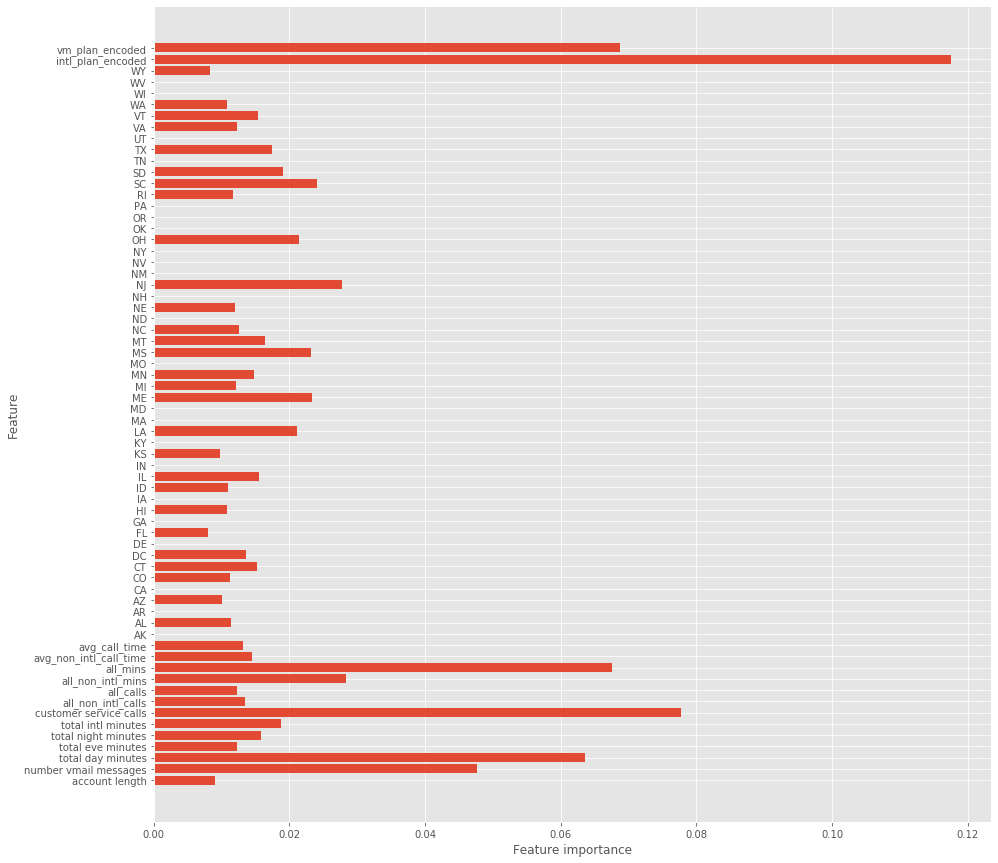

In [130]:
# plot feature importances of final model
plot_feature_importances(final_model, X_train_resampled, y_train_resampled)

Looking at the above for our final model, we can see various feature importances.  International plan sticks out as one of the most important features, followed by voicemail plan, and number of customer service calls.

## 6. Deployment
Label customers with high likelihoods of churning.

In [131]:
def preprocess(X):
    """
    Function to return preprocessed dataset
    """
    # One Hot Encode State Column
    ohe = OneHotEncoder(categories='auto', handle_unknown='ignore', sparse=False)
    X_ohe = ohe.fit_transform(X[['state']])
    X_ohe = pd.DataFrame(X_ohe, columns=ohe.categories_[0], index=X.index)
    X = X.drop('state', axis=1)
    X = pd.concat([X, X_ohe], axis=1)
    
    
    # Label Encode Voice Mail Plan and International Plan
    le = LabelEncoder()
    X['intl_plan_encoded'] = le.fit_transform(X['international plan'])
    X['vm_plan_encoded'] = le.fit_transform(X['voice mail plan'])
    X_encoded = X.drop(['international plan', 'voice mail plan'], axis=1)
    
    return X_encoded

In [132]:
transformed_data = preprocess(X)
transformed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3333 entries, 382-4657 to 400-4344
Data columns (total 66 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   number vmail messages   3333 non-null   int64  
 2   total day minutes       3333 non-null   float64
 3   total eve minutes       3333 non-null   float64
 4   total night minutes     3333 non-null   float64
 5   total intl minutes      3333 non-null   float64
 6   customer service calls  3333 non-null   int64  
 7   all_non_intl_calls      3333 non-null   int64  
 8   all_calls               3333 non-null   int64  
 9   all_non_intl_mins       3333 non-null   float64
 10  all_mins                3333 non-null   float64
 11  avg_non_intl_call_time  3333 non-null   float64
 12  avg_call_time           3333 non-null   float64
 13  AK                      3333 non-null   float64
 14  AL                      3333 non-n

In [133]:
# produce predictions
all_predictions = final_model.predict(transformed_data)
all_probs = final_model.predict_proba(transformed_data)

In [134]:
prob_df = pd.DataFrame(all_probs, index=transformed_data.index, columns=['Prob of No Churn', 'Churn Prob'])

In [135]:
prob_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3333 entries, 382-4657 to 400-4344
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Prob of No Churn  3333 non-null   float32
 1   Churn Prob        3333 non-null   float32
dtypes: float32(2)
memory usage: 212.1+ KB


In [136]:
# how many are labeled as 50% churn or higher
prob_df.loc[prob_df['Churn Prob'] >= 0.5]

,Prob of No Churn,Churn Prob
phone number,,
329-6603,0.084516,0.915484
351-7269,0.005847,0.994153
393-7984,0.032243,0.967757
360-1596,0.014264,0.985736
383-6029,0.045793,0.954207
...,...,...
417-1488,0.255898,0.744102
330-7137,0.106218,0.893782
411-5677,0.075745,0.924255


There are 431 customers that our model is labeling as having greater than 50% chance of churning.  As an initial list to be targeted for additional customer outreach and potential promos, this would be a good list to start with. 